In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

# Введение



**Сборный проект по материалам второго модуля**

---
**Описание исследования:**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.


**Цель исследования.**

научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.
---

**Задачи исследования.**

- Изучить источник данных;
- Выполнить предобработку если это необходимо;
- Провести исследовательский анализ;
- Очистить данные если это необходимо;
- Построить модель прогнозирования оттока клиентов;
- Сделать кластеризацию клиентов;
- Провести анализ.

---

**Исходные данные.**


Данные клиента за предыдущий до проверки факта оттока месяц:
`gender` — пол;  

`Near_Location` — проживание или работа в районе, где находится фитнес-центр;  

`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  

`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  

`Phone` — наличие контактного телефона;  

`Age` — возраст;  

`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
`Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);  

`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);  

`Group_visits` — факт посещения групповых занятий;  

`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;  

`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;  

`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.  

`Churn` — факт оттока в текущем месяце.


---

**План работы**

Часть 1. Изучение данных.
Открываем файл и ознакамливаемся с данными и их структурой.

Часть 2. Исследовательский Анализ. Предобработка и подготовка данных к анализу.

Часть 3. Строим модель прогнозирования оттока клиентов.

Часть 4. Кластеризаци клиентов.

Часть 5. Вывод. 

## Изучение данных

Составим первое впечатление о данных. Считаем датасет и сохраним его в переменной `df`. Выведем на экран 20 случайных строк и общую информацию о таблице.

In [2]:
df = pd.read_csv(***)
print(df.info())
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1058,0,1,0,1,1,6,0,25,62.922411,5.0,0,2.223131,1.338029,1
773,0,0,0,0,1,12,1,28,6.196236,9.0,2,1.403575,1.412545,0
1390,1,1,1,1,1,12,1,34,379.485207,9.0,8,1.780987,1.837634,0
3019,1,1,1,1,0,12,0,28,157.822044,12.0,4,1.086076,1.253319,0
2779,1,1,0,0,1,6,1,28,159.366956,6.0,3,1.168678,1.196979,0
755,0,1,0,0,1,1,0,29,128.664482,1.0,1,3.450940,3.374665,0
178,1,1,0,1,1,1,1,29,95.661558,1.0,1,2.179250,0.942722,1
3565,1,0,1,1,1,1,0,23,161.903343,1.0,2,0.471817,0.375318,0
3647,1,1,0,0,1,1,1,26,148.434052,1.0,2,2.955503,2.889211,0
3656,0,1,1,0,1,12,0,33,12.879439,12.0,10,0.913693,0.900506,0


Таблица содержит в себе данные о пользователях фитнес - клуба.   
Данные представлены на 4000  строках в 14 столбцах.  
В данных отсутствуют пропуски, названия столбцов указаны с большой буквы, лучше привести их к змеиному регистру.

### Вывод
 
Можно утверждать, что, данных достаточно для обучения моделей. Пропусков не выявлено.

Необходимо более детально изучить данные и избавиться от проблем, прежде чем приступить к обучению алгоритмов.

## Исследовательский анализ данных (EDA)

Перепишем названия столбцов с маленькой буквы с помощью `str.lower()`

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Проверим датасет на наличие дубликатов:

In [4]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

---
Изучим средние значения и стандартные отклонения методом `describe():`

In [5]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


По данным можно сказать что:
- В данных практически одинаковое количество мужчин и женщин.
- В среднем 8 из 10 клиентов фитнес-клуба живут или работают рядом с ним.
- Почти половина клиентов являются сотрудниками компаний-партнёров и приобрели клубную карту со скидкой.
- В среднем три из 10 клиентов пришли по акции 'приведи друга'
- 9 из 10 клиентов оставили свой номер телефона.
- Средняя продолжительность контракта - 4,7 месяцев. Высокое стандартное отклонение говорит о большом количестве клиентов с годовым и месячным сроком контракта, с перевесом последних.
- В среднем 4 из 10 клиентов посещают групповые занятия.
- Средний возраст клиента - 29 лет.
- Средняя трата клиента за всё время - 147 у.е. признак имеет высокий показатель стандартного отклонения, что говорит о большом количестве высоких значений. 75% и 100% перцентили говорят нам о том, что более четверти выборки потратили от 210 до 552 у.е.
- Среднему клиенту осталось 4 месяца до конца истечения срока действия клубной карты. Более половины клиентам осталось заниматься не больше месяца.
- Средняя 'продолжительность жизни' клиента - около 4 месяцев. Стандартное отклонение чуть больше среднего, значит в выборке присутствуют как клиенты с меньшим, так и сильно большим сроком посещения клуба. Срок посещения самого 'долгого' клиента - 31 месяц - чуть более 2 с половиной лет.
- Значения столбцов среднего количества занятий за весь период и за текущий месяц достаточно похожи. В среднем клиент посещает фитнес-клуб чуть менее двух раз в неделю. Четверть клиентов ходят раз в неделю, а фанаты фитнеса посещают клуб 6 раз в неделю.
- Отвалившихся клиентов примерно 26% из всей выборки, т.е. каждый 4 клиент из датасета.

Посмотрим на средние значения параметров и ушедших клиентов и сравним их с действующими:

In [6]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Также посмотрим на распределения среди этих двух групп. Для этого в цикле отрисуем распределения признаков. Для дискретных величин построим столбчатые диаграммы с накоплением, а для остальных - гистограммы распределения:

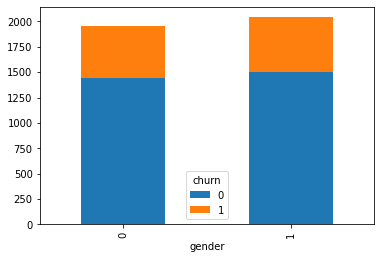

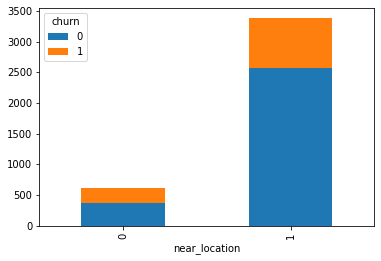

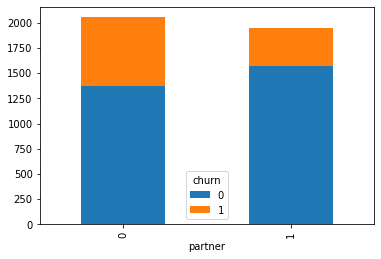

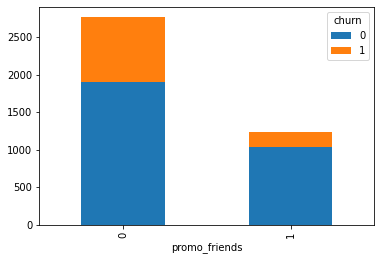

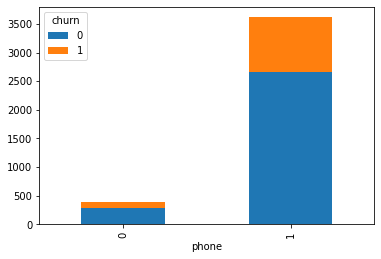

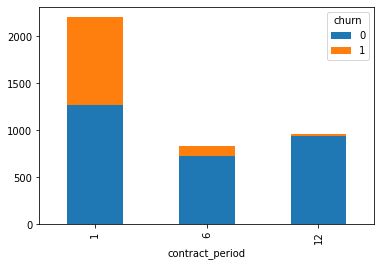

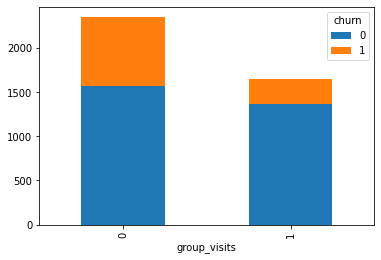

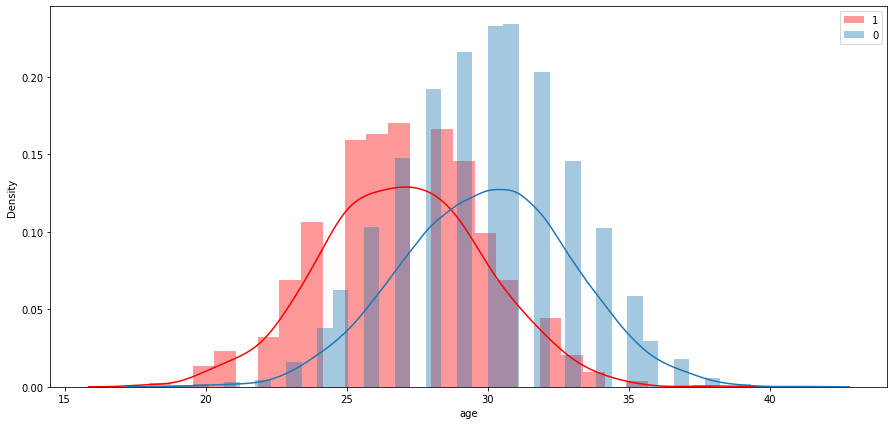

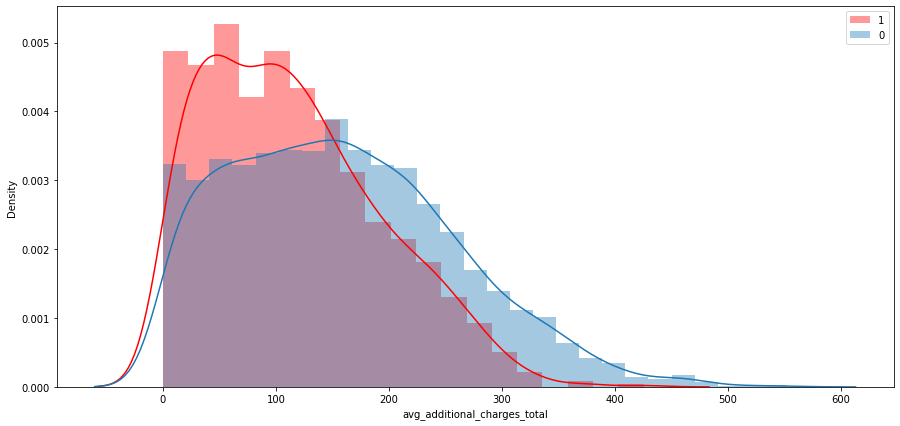

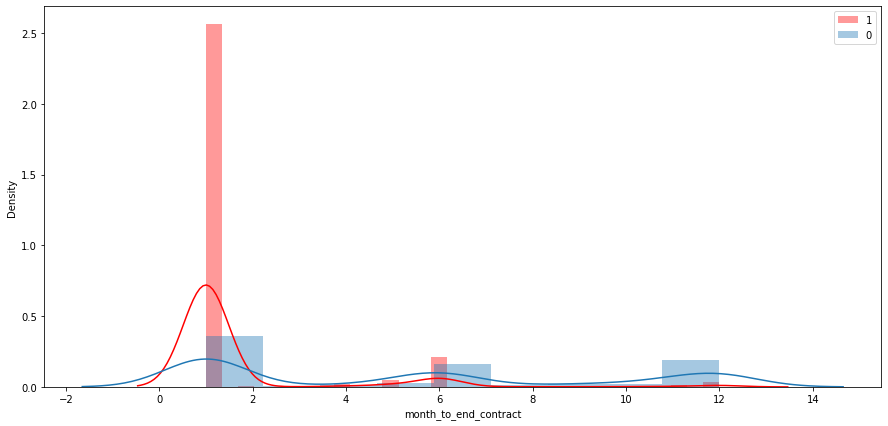

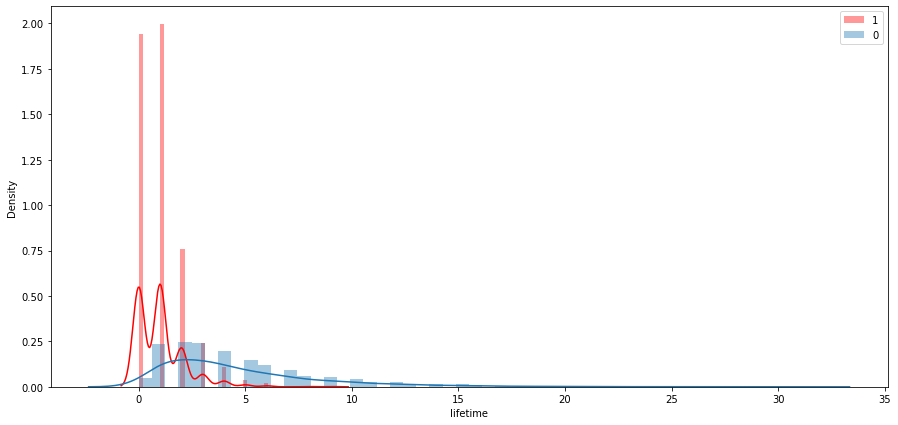

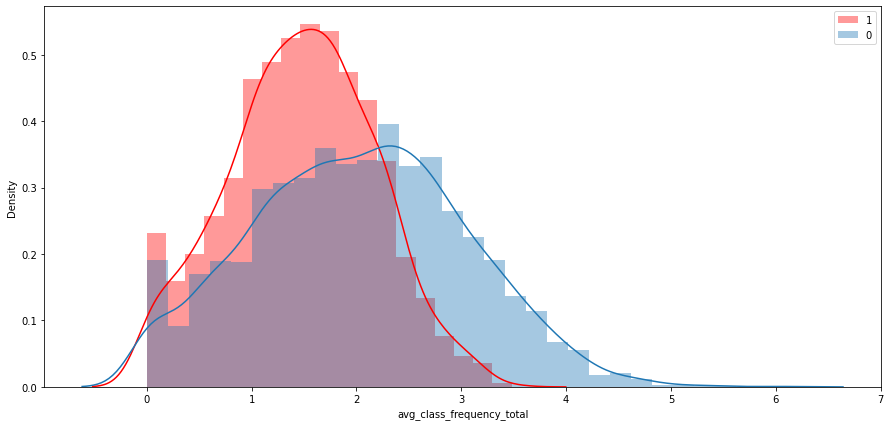

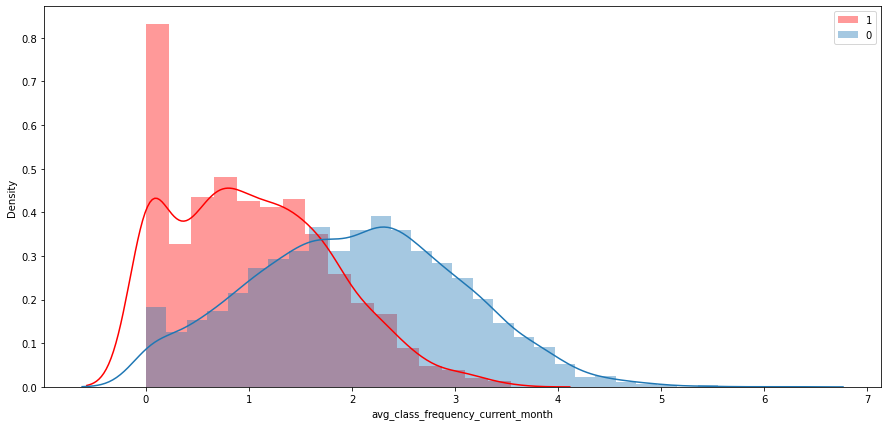

In [7]:
for i in df.drop('churn', axis=1).columns:
    if len(df[i].unique())>3:
        plt.figure(figsize=(15,7))
        sns.distplot(df.query('churn==1')[i], color='red',label=1)
        plt.legend()
        sns.distplot(df.query('churn==0')[i],label=0)
        plt.legend()
        plt.show()
    else:
        df.reset_index().pivot_table(index=i, columns='churn', values='index', aggfunc='count').plot(kind='bar', stacked = True)
        

- Посетители попадающие в отскок на 11% реже живут или работают рядом с фитнес-клубом.
- Так же отвалившиеся клиенты на 17% или почти в два раза реже приходят от друзей.
- В основном такие клиенты берут карты на месяц, в то время как 'постоянники' чаще приобретают карты на пол года.
- Отвалившиеся клиенты реже ходят на групповые занятия (26% против 46%). 
- В среднем клиенты, попавшие в отскок на три года моложе постоянных(27 против 30 лет). 
- Они меньше тратят(158 против 115 у.е.)
- Им осталось меньше до истечения контракта и у них меньше лайфтайм, что объяснимо большим количеством клубный карт сроком в месяц. 
- За весь период в среднем они занимаются полтора раза в неделю, а в последний перед уходом месяц 1 раз в неделю, у 'постоянников' этот показатель в среднем - 2 посещения в неделю.
- Гендерные распределения у обеих групп не отличаются.

Построим матрицу корреляций и отобразим её на тепловой карте:

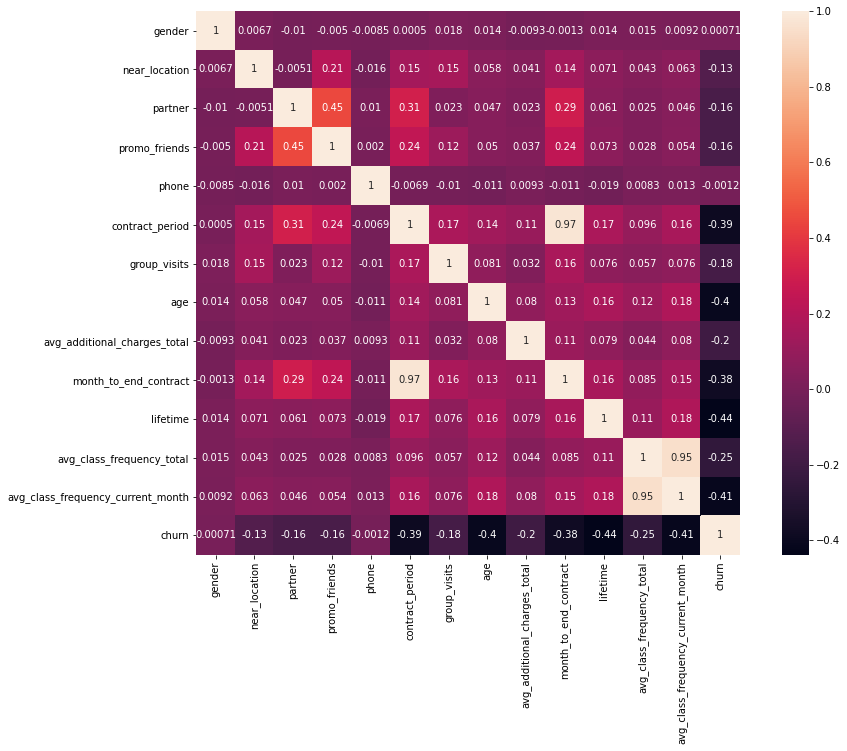

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), square=True, annot=True)
plt.show()

Сильной линейной зависимости между целевым показателем(попадание в отскок) и остальными параметрами не обнаружено. Сильнее всего целевой показатель связан со сроком контракта, возрастом, кол-вом месяцев до завершения контракта, лийфтаймом и количеством посещений в последний месяц.
Также на карте можно увидеть две пары мультиколлинеарных признаков:     
средним кол-вом посещений в последний месяц и за весь срок;  
сроком контракта и количеством оставшихся месяцев до его завершения.

Избавимся от одного признака в каждой паре. Уберём те, что слабее влияют на целевой признак - количество оставшихся месяцев и среднее число посещений за весь период.

In [9]:
df=df.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis=1)

Данные готовы к обучению моделей.

### Вывод
 
* Названия столбцов изменили на написанные с маленькой буквы.
- Посетители попадающие в отскок на 11% реже живут или работают рядом с фитнес-клубом.
- Так же отвалившиеся клиенты на 17% или почти в два раза реже приходят от друзей.
- В основном такие клиенты берут карты на месяц, в то время как 'постоянники' чаще приобретают карты на пол года.
- Отвалившиеся клиенты реже ходят на групповые занятия (26% против 46%). 
- В среднем клиенты, попавшие в отскок на три года моложе постоянных(27 против 30 лет). 
- Они меньше тратят(158 против 115 у.е.)
- Им осталось меньше до истечения контракта и у них меньше лайфтайм, что объяснимо большим количеством клубный карт сроком в месяц. 
- За весь период в среднем они занимаются полтора раза в неделю, а в последний перед уходом месяц 1 раз в неделю, у 'постоянников' этот показатель в среднем - 2 посещения в неделю.
* Из датасета удалены два мультиколлинеарных признака: кол-во месяцев до истечения контракта и общее среднее кол-во посещений в недедлю 
- Сильнее всего целевой показатель связан со сроком контракта, возрастом, лийфтаймом и количеством посещений в последний месяц.

## Строим модель прогнозирования оттока клиентов

Выделим целевой признак и параметры:

In [10]:
X=df.drop(columns=['churn'])
y=df['churn']

Разбейте данные на обучающую и валидационную выборку функцией `train_test_split()` в пропорции 80 на 20.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем обучающую и валидационную выборки с помощью `StandardScaler()`:

In [12]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель Логистической регрессии и посмотрим на метрики:

In [13]:
model = LogisticRegression(solver='liblinear', random_state=0)

# обучите модель
model.fit(X_train_st, y_train)

# делаем прогноз
predictions = model.predict(X_test_st)

In [14]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.90
Precision: 0.79
Recall: 0.82


Обучим модель Случайного леса и сравним метрики с предыдущей моделью:

In [15]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)

In [16]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Accuracy: 0.90
Precision: 0.81
Recall: 0.75


### Вывод
Лучше показала себя модель логистической регрессии. При одинаковом показателе точности она имеет на 7% более высокий `recall`, хотя и `precision` ниже на 2%. Это означае что первая модель лучше определяет клиентов, которые попадут в отскок, но при этом допускает больше ложноположительных срабатываний. Так как задача фитнес клуба - выявить и удержать большее количество клиентов, модель Логистической регрессии подойдёт тут лучше.

## Кластеризация клиентов

Построим матрицу расстояний функцией `linkage()`. Поскольку сейчас нет смысла делить выборку на обучающую и валидационную, передадим функции весь стандартизированный набор данных:

In [17]:
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

Отрисуем дендрограмму:

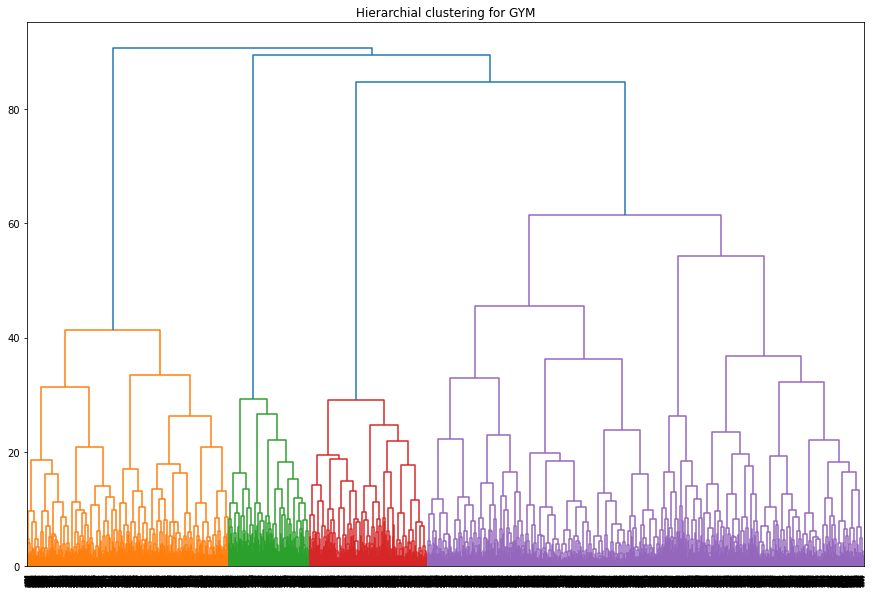

In [18]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Дендрограмма выделила 4 кластера. Хотя создатели проекта рекоммендуют 5, при использовании этого количества у меня получились плохо интерпретируемые данные и графики. Передадим число кластеров функции `KMeans`:

In [27]:
km = KMeans(n_clusters=4, random_state=0) # задаём число кластеров, равное 4, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

Добавим кластеры в датафрейм:

In [28]:
df['group']=labels
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn,group
0,1,1,1,1,0,6,1,29,14.227470,3,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,2,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,2,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,3,1.120078,0,3


Посмотрим на средние значения признаков по кластерам:

In [25]:
df.groupby('group').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
group,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839
1,0.495448,0.670713,0.296662,0.044006,1.0,1.946131,0.207891,27.554628,118.680416,1.916540,1.212660,0.593323
2,0.526951,0.921963,0.370072,0.004023,1.0,5.893805,0.535800,30.572003,173.536262,5.133548,2.253940,0.032180
3,0.504274,0.966762,0.867996,1.000000,1.0,6.638177,0.516619,29.544160,151.931807,4.245964,1.902015,0.129155


Сразу же можно описать характерные отличия кластеров:
Больше всего к оттоку склонен кластер 1(59%). Меньше всего-кластер 2(3%).
Клиенты из кластера, склонного к оттоку реже остальных посещают фитнес-клуб в последний месяц занятий, имеют меньший лайфтайм, меньшие траты на доп. услуги, в среднем на пару лет моложе, берут клубные карты  на более короткий период, меньше посещают групповые занятия, редко приходят от друзей и являются сотрудником компании-партнёра.

---
Посмотрим на распределения признаков кластеров на графиках:

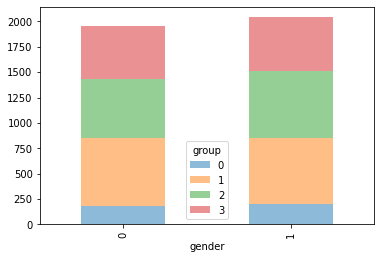

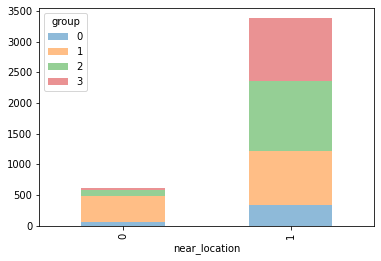

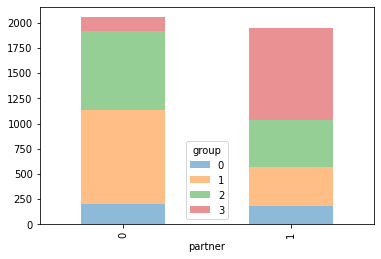

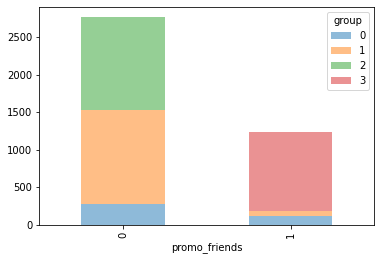

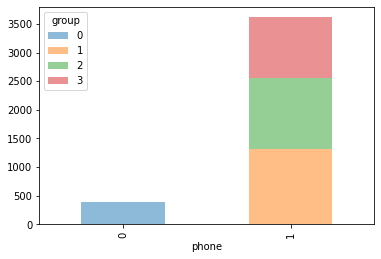

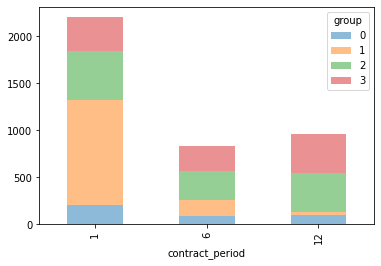

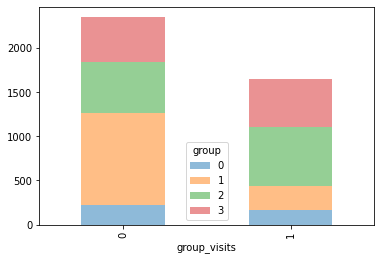

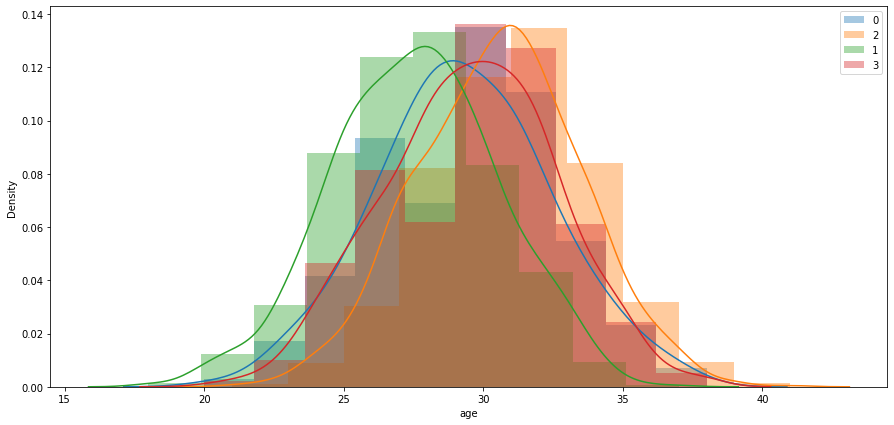

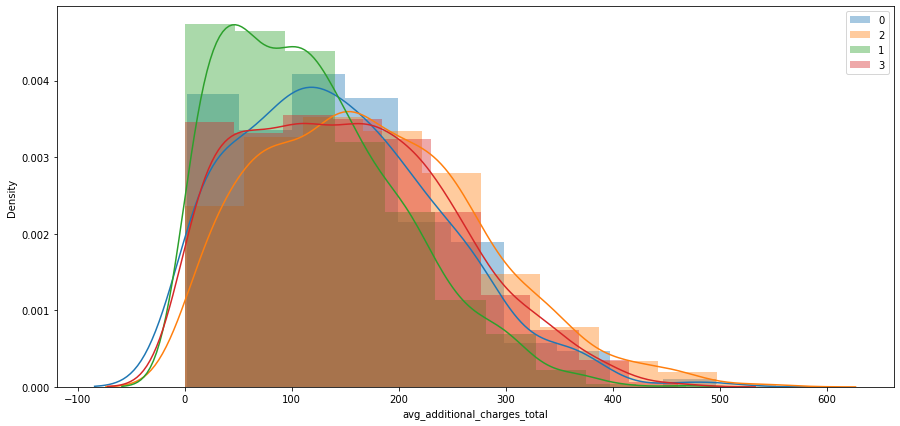

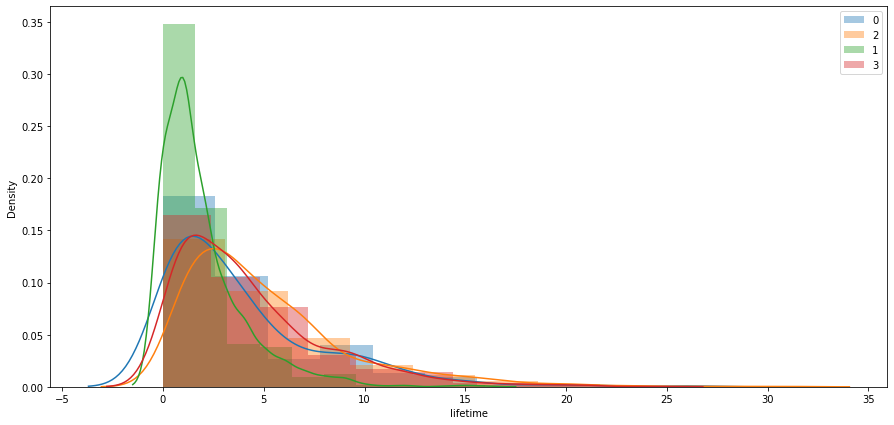

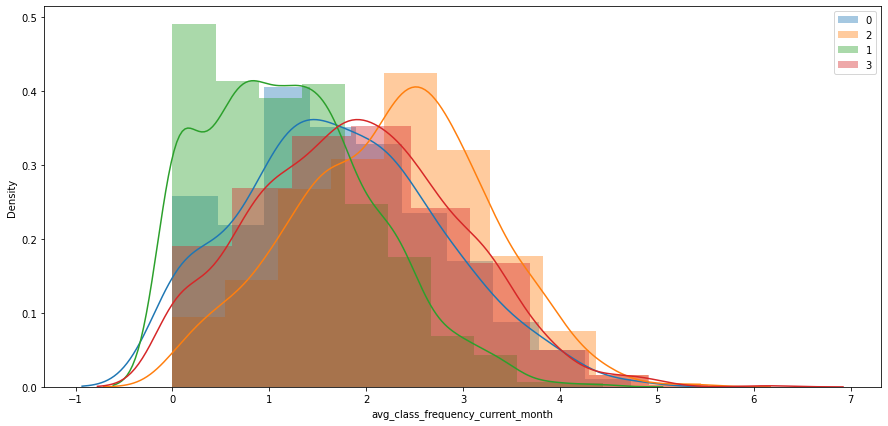

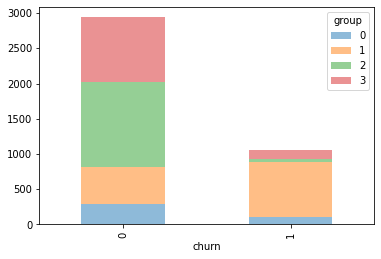

In [22]:
for i in df.drop('group', axis=1).columns:
    if len(df[i].unique())>3:
        plt.figure(figsize=(15,7))
        for g in df['group'].unique():
            sns.distplot(df.query('group==@g')[i],label=g, bins=10)
            plt.legend()
        plt.show()
    else:
        df.reset_index().pivot_table(index=i, columns='group', values='index', aggfunc='count').plot(kind='bar', stacked = True, alpha=0.5)

По распределениям видно следующее:
- Из тех, кто не живёт и не работает рядом с фитнес-клубом больше всего представителей кластера, склонного к отвалу. Из тех, кто располагается рядом - большое количество клиентов из кластера 2(3% оттока) и 3(13%оттока).
- 3 кластер(13% оттока) занимает большую часть пришедших от друзей и являющихся сотрудником компании-партнёра.
- не оставили номер телефона только клиенты кластера 0(26% оттока)
- больше половины клиентов, оформивших контракт на месяц принадлежат к кластеру 1, склонному к оттоку.
- примерно половина не посещающих групповые занятия клиентов принадлежат к кластеру 1, склонному к оттоку.
- распределение по возрасту у кластера оттока сдвинуто влево, а самого стабильного кластера - вправо. Пиковые значения: примерно 28 и 33 года.
- распределение кластера 1 по тратам сдвинуто в лево, пиковые значиния находятся радом с нулём.
- также у кластера 1(склонного к оттоку) пик лайфтайма и количества посещений в неделю за последний месяц находится возле нуля.
- подавляющее большинство из клиентов, попавших в отток находятся в 1 кластере.

### Вывод

Алгоритм иерархической кластеризации выделил 4 кластера клиентов в датасете.

Портрет склонного к оттоку клиента:
- Живёт/работает далеко от фитнес-клуба
- Не оставляет контактные данные
- Оформляет контракт сроком на месяц
- Не посещает групповые занятия
- Возрастом до 30 лет
- Тратит мало денег на доп. услуги
- Редко посещает клуб чаще раза в неделю

## Выводы и  базовые рекомендации по работе с клиентами

* В ходе предобработки:

Регистр названий столбцов был заменён на нижний.
Удалены столбцы с количеством месяцев до окончания контракта и посещений в неделю в среднем за весь срок.

* Во время обучения моделей лучше себя показала модель Логистической регрессии.

* Были выделены 4 кластера клиентов.

* Составлен портрет потенциально попадающего в отток клиента: 
Как правило живёт далеко от клуба, реже посещает групповые занятия и клуб в принципе, покупает контракт на месяц и редко приходит по промо-акции, а также тратит меньше денег на доп.услуги, чем большинство остальных клиентов.

---

На основании полученной информации сформулируем реккомендации:

- Активно рекламировать групповые занятия среди клиентов, купивших клубную карту на месяц, либо редко посещающих клуб. На этих занятиях клиент может завести социальные связи, что способствует его дальнейшим посещениям фитнес-клуба.
- Продолжать промо акции: клиенты, пришедшие по ним часто остаются надолго.
- Формировать выгодные предложения клиентам, купившим клубную карту на месяц, либо редко посещающим клуб, котырых модель предсказаия идентифицирует как склонных к оттоку, на покупку клубной карты длительного срока действия.

Исследование можно считать завершённым.